In [1]:
#import statements

#give this
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
%matplotlib inline

#physical constants
c_speed = 3.0e10 #cm/s

Index(['Wavelength', 'Flux'], dtype='object')


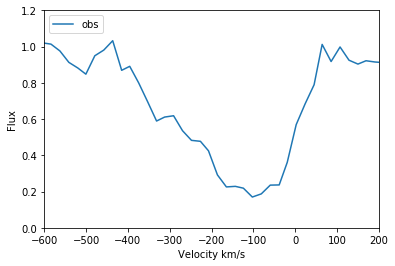

In [2]:
#read in observation data, save data to variables, convert to velocity and plot a profile
#they write this

#function to read in spectrum, convert to velocity and return
#wavelength and flux numpy arrays
def convert_to_vel(wavelengths, rest_wave):
    vel = c_speed*(wavelengths/rest_wave -1)
    return vel  #cm/s

obs_data = pd.read_csv('Spring/obs_noOVI.txt')
print(obs_data.columns)

wavelengths = obs_data['Wavelength']
flux = obs_data['Flux']

#convert to velocity
vels = convert_to_vel(wavelengths, 1402.77)/1e5
#convert velocity to km/s  


#plot around vel = 0
plt.plot(vels, flux, label = 'obs')
plt.ylim(0, 1.2)
plt.xlim(-600, 200)
plt.ylabel('Flux')
plt.xlabel('Velocity km/s')
plt.legend(loc=2)

In [9]:
#read in simulation data file, save data to variables
#they write this

sim_data = pd.read_csv('Spring/SiIV.txt')
print(sim_data.columns)
print(len(sim_data['Run']))
print(sim_data['Run'])

Index(['Run', ' velocity(km/s)', ' b(km/s)', ' Temp(K)', ' N_fit',
       ' upper_N_err', ' lower_N_err', ' q_fit', ' upper_q_err',
       ' lower_q_err', ' area', ' area_err'],
      dtype='object')
88
0     T0.3_v1000_chi300_cond
1     T0.3_v1000_chi300_cond
2     T0.3_v1000_chi300_cond
3     T0.3_v1000_chi300_cond
4      T3_v3000_chi3000_cond
               ...          
83        T10_v1500_chi10000
84           T1_v480_chi1000
85           T1_v480_chi1000
86           T1_v480_chi1000
87           T1_v480_chi1000
Name: Run, Length: 88, dtype: object


In [4]:
#calculate tau/profile shape from simulation data
#give them a formula for this
runNumber = 16  #this selects the run
print(sim_data['Run'][runNumber])

#get data from simulation file
vel_ion = sim_data[' velocity(km/s)'][runNumber]
b = sim_data[' b(km/s)'][runNumber]
N_avg = sim_data[' area'][runNumber]

#ion/transistion cross section
sigma = 6.359e-18 

#covering fraction estimate
f = 1.0

##Can they make this a function so they can just call the function whenever they want to find the flux?
def flux_func(vel_ion, b, N_avg, f, vels):
    tau = ((c_speed/1.e5)*sigma)/(np.sqrt(np.pi)*b)*np.exp(-((vels + vel_ion)**2/b**2))
    sim_flux = (1-f) + f*np.exp(-1*tau*N_avg)
    return np.array(sim_flux)


T3_v3000_chi3000


Text(0, 0.5, 'Normalized Flux')

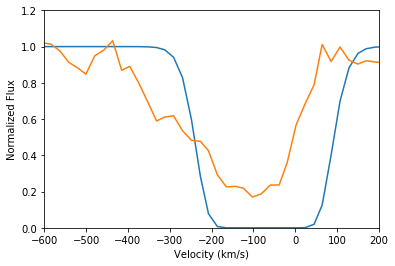

In [5]:
#plot the simulation profile shape
#they write this
plt.plot(vels, flux_func(vel_ion, b, N_avg, f, vels))
plt.plot(vels, flux)
plt.xlim(-600, 200)
plt.ylim(0, 1.2)
plt.xlabel('Velocity (km/s)')
plt.ylabel('Normalized Flux')

Text(0, 0.5, 'Normalized Flux')

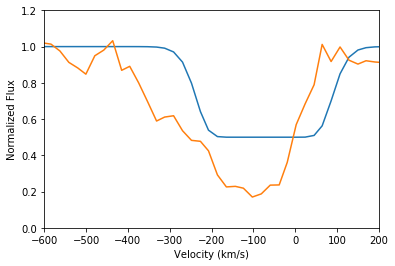

In [6]:
#adjust simulation profile with a parameter, plot - can you get it to match observations?
#they write this

#plot the simulation profile shape
#they write this
f = 0.5
plt.plot(vels, flux_func(vel_ion, b, N_avg, f, vels))
plt.plot(vels, flux)
plt.xlim(-600, 200)
plt.ylim(0, 1.2)
plt.xlabel('Velocity (km/s)')
plt.ylabel('Normalized Flux')

Best F value: 0.71
Best F value: 0.73
Best F value: 0.73
Best F value: 0.74


Text(0, 0.5, 'Chi^2')

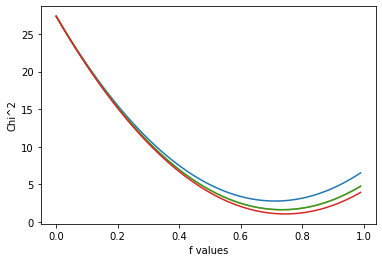

In [7]:
#use statistics to find the most likely value for the new parameter 
#start with: one ion in one run at one time
#next: for one ion in one run, over all four times (different velocities)
#extra: for one particular ion over all runs/times?
### CHI SQUARED! ###

#chi_sq ~ (obs - flux)
#what is flux here?  - the flux from above! flux changes for different values of f
#minimize chi-squared, finding the f that is most likely

#loop through f values: 
    #calculate flux (at all velocities)
    #calculate chi term by substracting flux from obs --> (obs - expect)**2/expect
    #sum chi term for total chi
    
#compare chi squared for each f to find the minimum
#plot? find minimum? 

#select only the velocities and fluxes between -600 and 200 km/s
newvels = []
newflux = []
for i in range(len(vels)):
    if vels[i] < 200 and vels[i] > -600:
        newvels.append(vels[i])
        newflux.append(flux[i])
        
newvels = np.array(newvels)
newflux = np.array(newflux)


chis = [[],[],[],[]]
for time in range(len(chis)):
    #get data from simulation file
    vel_ion = sim_data[' velocity(km/s)'][time+runNumber]
    b = sim_data[' b(km/s)'][time+runNumber]
    N_avg = sim_data[' area'][time+runNumber]
    fvalues = np.arange(0, 1, 0.01)
    for f in fvalues:
        #calculate flux for this time
        fluxes = flux_func(vel_ion, b, N_avg, f, newvels) 
        #make sure you use the same list of velocities as the observations!
        chi_each = (fluxes - newflux)**2/newflux
        sum_chi = chi_each.sum()
        chis[time].append(sum_chi)

bestf = np.zeros(4)
for time in range(len(chis)):
    minChi_index = np.argmin(chis[time])
    print("Best F value: "+str(fvalues[minChi_index]))
    bestf[time] = fvalues[minChi_index]

plt.plot(fvalues, chis[0])
plt.plot(fvalues, chis[1])
plt.plot(fvalues, chis[2])
plt.plot(fvalues, chis[3])
plt.xlabel('f values')
plt.ylabel('Chi^2')

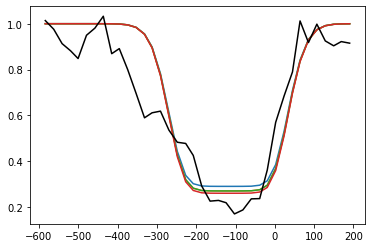

In [8]:
#plot the profile shape from the most likely parameter value over the observation profile
#they write this

plt.plot(newvels, flux_func(vel_ion, b, N_avg, bestf[0], newvels))
plt.plot(newvels, flux_func(vel_ion, b, N_avg, bestf[1], newvels))
plt.plot(newvels, flux_func(vel_ion, b, N_avg, bestf[2], newvels))
plt.plot(newvels, flux_func(vel_ion, b, N_avg, bestf[3], newvels))
plt.plot(newvels, newflux, color = 'black')